Equation 1:
Eq(0.2*c*s, 0.35)
Equation 2
Eq(c*(0.2 - 0.3875*s), -0.1)
 
Values of 2 unknown variable are as follows:
(2.89062500000000, 0.605405405405405)
2.89062500000000
0.605405405405405
Fraction of non users [0.3        0.24443814 0.18478413 0.12268395 0.05959269 0.00326438
 0.06490413 0.12457789 0.18174988 0.23606798 0.28733136 0.33545873
 0.38045943 0.42240832 0.46142523 0.49765859 0.53127288 0.56243944
 0.59132985 0.61811139 0.64294417 0.66597932 0.6873581  0.70721162
 0.72566087 0.74281711 0.7587824  0.77365016 0.78750583 0.80042747
 0.81248644 0.82374797 0.83427168 0.84411214 0.8533193  0.86193894
 0.87001305 0.8775802  0.88467583 0.89133254 0.89758035 0.90344697
 0.90895794 0.91413688 0.91900562 0.92358438 0.92789187 0.93194549
 0.93576133 0.93935439 0.94273861 0.94592696 0.94893149 0.95176347
 0.9544334  0.95695107 0.95932564 0.96156566 0.96367912 0.96567352
 0.96755585 0.96933268 0.97101017 0.97259408 0.97408982 0.97550247
 0.9768368  0.97809728 0.97928813 0.9804133  0.9814

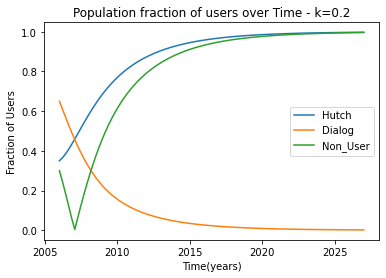

Fraction of Hutch users [0.35       0.36511917 0.38467719 0.40757354 0.43280909 0.45951424
 0.48695969 0.51455483 0.54183785 0.56846115 0.59417452 0.61880819
 0.64225695 0.66446591 0.68541835 0.70512566 0.72361919 0.74094389
 0.75715341 0.77230636 0.78646361 0.79968632 0.81203457 0.82356642
 0.83433732 0.84439976 0.85380314 0.86259366 0.87081442 0.87850548
 0.88570404 0.89244453 0.89875886 0.90467654 0.91022486 0.91542907
 0.92031252 0.92489681 0.92920193 0.9332464  0.93704736 0.94062072
 0.94398122 0.94714255 0.95011742 0.95291764 0.95555421 0.95803734
 0.96037654 0.9625807  0.9646581  0.96661644 0.96846294 0.97020432
 0.97184687 0.97339649 0.97485867 0.97623857 0.97754102 0.97877055
 0.97993139 0.98102752 0.98206269 0.98304039 0.98396392 0.98483636
 0.98566064 0.98643947 0.98717544 0.98787096 0.9885283  0.98914961
 0.98973691 0.99029209 0.99081694 0.99131315 0.99178232 0.99222594
 0.99264543 0.99304211 0.99341724 0.99377202 0.99410755 0.99442491
 0.99472506 0.99500898 0.99527753 0.99

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Eq, solve


c, s = symbols('c,s')

# defining equations
eq1 = Eq((c*(((1-0)*(1-0.2)*s*(1-0.75)**1) - (0*(1-s)*(1-0)**1))), 0.35)
print("Equation 1:")
print(eq1)
eq2 = Eq((c*(((1-0.75)*(1-0.2)*(1-s)*(1-0)**1) - (0.75*s*(1-0.75)**1))), -0.1)
print("Equation 2")
print(eq2)

# solving the equation
print(" ")
print("Values of 2 unknown variable are as follows:")
ans = solve((eq1, eq2), (c, s))
a = ans[0]
print(a)
c_value = a[0]
print(c_value)
s_value = a[1]
print(s_value)


def dSdx(t,P,c1,s1):
    h, g = P
    return [c1*(((1-h)*(1-0.2)*s1*(1-g)**1) - (h*(1-s1)*(1-h)**1)),
            c1*(((1-g)*(1-0.2)*(1-s1)*(1-h)**1) - (g*s1*(1-g)**1))]

h_0 = 0.35
g_0 = 0.65
P_0 = (h_0 ,g_0)

t = np.linspace(2006,2027,100)
c1 = c_value
s1 = s_value
sol = odeint(dSdx, y0=P_0, t=t, tfirst=True,args=(c1,s1))

h_sol = sol.T[0]  #y1 = first cosolve((eq1, eq2), (c, s)))lumn of sol
g_sol = sol.T[1]  #y2 = 2nd column of sol

n = len(h_sol)

N = np.zeros(n)

for i in range(n):
    N[i] = abs(h_sol[i]-g_sol[i])
    
print("Fraction of non users",N)
    

plt.plot(t,h_sol,label="Hutch")
plt.plot(t,g_sol,label="Dialog")
plt.plot(t,N,label="Non_User")
plt.xlabel("Time(years)")
plt.ylabel("Fraction of Users")
plt.title("Population fraction of users over Time - k=0.2")
plt.legend()
plt.show()


print("Fraction of Hutch users",h_sol)
print("Fraction of Dialog users",g_sol)

